# DATA *PREPARATION*

In [ ]:

!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip show catboost

**IMPORTING VARIOUS MODULES**

In [ ]:
#Loading all Packages
# Library for Data Manipulation
import numpy as np
import pandas as pd
#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

LOADING DATASET


---



In [ ]:
employee_data = pd.read_csv(r'/content/drive/MyDrive/attrition.csv')

In [ ]:
employee_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee_data.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [ ]:
# Print the shape of the DataFrame
print("The shape of data frame:", employee_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(employee_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(employee_data.columns))

The shape of data frame: (1470, 35)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 35


In [ ]:
print("Column labels in the dataset in column order:")
for column in employee_data.columns:
    print(column)

Column labels in the dataset in column order:
Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [ ]:
# Print the Long summary of the dataframe by setting verbose = True
# Check for Non-Null or Nan Nalues in the dataset.
print(employee_data.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employee_data.select_dtypes(np.number).sample(5).style.set_properties(**{'background-color': '#E9F6E2',
                                                              'color': 'black','border-color': '#8b8c8c'})

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
569,36,1434,8,4,1,789,1,76,2,3,1,7587,14229,1,15,3,2,80,0,10,1,3,10,7,0,9
1100,35,1402,28,4,1,1554,2,98,2,1,3,2430,26204,0,23,4,1,80,2,6,5,3,5,3,4,2
234,33,813,14,3,1,325,3,58,3,1,4,2436,22149,5,13,3,3,80,1,8,2,1,5,4,0,4
1184,54,584,22,5,1,1665,2,91,3,4,3,17426,18685,3,25,4,3,80,1,36,6,3,10,8,4,7
639,49,1418,1,3,1,887,3,36,3,1,1,3580,10554,2,16,3,2,80,1,7,2,3,4,2,0,2


In [ ]:
employee_data["Education"] = employee_data["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})

In [ ]:
employee_data["EnvironmentSatisfaction"] = employee_data["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [ ]:
employee_data["JobInvolvement"] = employee_data["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [ ]:
employee_data["JobLevel"] = employee_data["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",
                                         5:"Executive Level"})

In [ ]:
employee_data["JobSatisfaction"] = employee_data["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [ ]:
employee_data["PerformanceRating"] = employee_data["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})

In [ ]:
employee_data["RelationshipSatisfaction"] = employee_data["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [ ]:
employee_data["WorkLifeBalance"] = employee_data["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [ ]:
employee_data.select_dtypes(include="O").sample(5).style.set_properties(**{'background-color': '#E9F6E2',
                                                                'color': 'black','border-color': '#8b8c8c'})

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
19,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Very High,Male,High,Entry Level,Research Scientist,Very High,Single,Y,Yes,Excellent,High,Better
325,No,Travel_Frequently,Research & Development,College,Life Sciences,High,Female,Medium,Mid Level,Manufacturing Director,High,Married,Y,No,Outstanding,Low,Better
1051,No,Travel_Frequently,Sales,Doctor,Marketing,Low,Female,High,Junior Level,Sales Executive,High,Married,Y,No,Excellent,High,Good
681,No,Travel_Rarely,Research & Development,Bachelor,Technical Degree,Very High,Female,High,Mid Level,Research Director,Low,Married,Y,No,Excellent,Medium,Better
1098,No,Non-Travel,Research & Development,College,Life Sciences,Very High,Male,High,Junior Level,Healthcare Representative,Very High,Divorced,Y,Yes,Excellent,High,Better


In [ ]:
# Calculate the number of missing values in each column

missing_df = employee_data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(employee_data))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [ ]:
employee_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


In [ ]:
employee_data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [ ]:
# Print top 5 rows in the dataframe.
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [ ]:
# Print the shape of the DataFrame
print("The shape of data frame:", employee_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(employee_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(employee_data.columns))

The shape of data frame: (1470, 31)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 31


In [ ]:
employee_data.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


In [ ]:
# Calculate the number of unique values in each column
for column in employee_data.columns:
    print(f"{column} - Number of unique values : {employee_data[column].nunique()}")
    print("=============================================================")

Age - Number of unique values : 43
Attrition - Number of unique values : 2
BusinessTravel - Number of unique values : 3
DailyRate - Number of unique values : 886
Department - Number of unique values : 3
DistanceFromHome - Number of unique values : 29
Education - Number of unique values : 5
EducationField - Number of unique values : 6
EnvironmentSatisfaction - Number of unique values : 4
Gender - Number of unique values : 2
HourlyRate - Number of unique values : 71
JobInvolvement - Number of unique values : 4
JobLevel - Number of unique values : 5
JobRole - Number of unique values : 9
JobSatisfaction - Number of unique values : 4
MaritalStatus - Number of unique values : 3
MonthlyIncome - Number of unique values : 1349
MonthlyRate - Number of unique values : 1427
NumCompaniesWorked - Number of unique values : 10
OverTime - Number of unique values : 2
PercentSalaryHike - Number of unique values : 15
PerformanceRating - Number of unique values : 2
RelationshipSatisfaction - Number of uniq

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/HR-Employee-Attrition.csv')
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']


In [ ]:
print('Attrition' in categorical_features)

False


In [ ]:
categorical_features = [feature for feature in categorical_features if feature != 'Attrition']

In [ ]:
categorical_features = []
for column in employee_data.columns:
    if employee_data[column].dtype == object and len(employee_data[column].unique()) <= 30:
        categorical_features.append(column)
        print(f"{column} : {employee_data[column].unique()}")
        print(employee_data[column].value_counts())
        print("====================================================================================")


Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Education : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
EnvironmentSatisfaction : ['Medium' 'High' 'Very High' 'Low']
High 

In [ ]:
employee_data.to_csv('IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv', index=False)

# STATISTICAL ANALYSIS







1.PERFORM ANOVA TEST

In [ ]:
# Library for Data Manipulation
import numpy as np
import pandas as pd

# Library for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
employee_data = pd.read_csv(r'/content/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

In [ ]:
# Print the shape of the DataFrame
print("The shape of data frame:", employee_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(employee_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(employee_data.columns))

The shape of data frame: (1470, 31)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 31


In [ ]:
num_cols = employee_data.select_dtypes(np.number).columns

In [ ]:
new_df = employee_data.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})

In [ ]:
!pip install scipy
import scipy.stats as stats

f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])

    f_scores[column] = f_score
    p_values[column] = p_value

2.VISUALISE F_SCORE OF ANOVA TEST

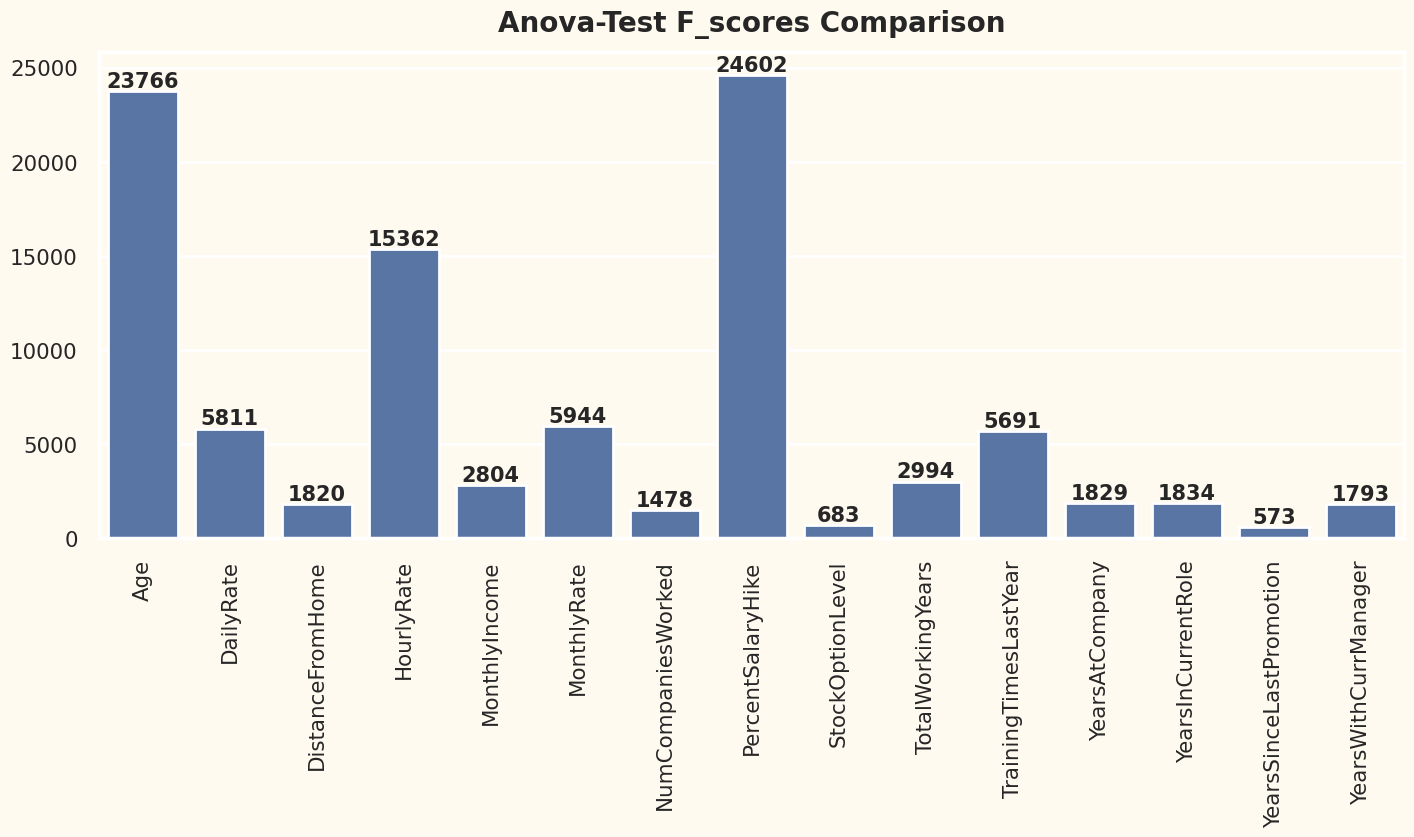

In [ ]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

3.COMPARING  F_SCORE  AND  P_SCORE  OF ANOVA TEST

In [ ]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
test_df

,Features,F_Score,P_value
0,Age,23766.934042,0.00000000000000000000
1,DailyRate,5811.796569,0.00000000000000000000
2,DistanceFromHome,1820.614585,0.00000000000000000000
3,HourlyRate,15362.122371,0.00000000000000000000
4,MonthlyIncome,2804.459632,0.00000000000000000000
5,MonthlyRate,5944.089071,0.00000000000000000000
6,NumCompaniesWorked,1478.188633,0.00000000000000000000
7,PercentSalaryHike,24602.507947,0.00000000000000000000
8,StockOptionLevel,683.069576,0.00000000000000000000
9,TotalWorkingYears,2994.906310,0.00000000000000000000


4.PERFORM CHI SQUARE TEST

In [ ]:
cat_cols = employee_data.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [ ]:
!pip install scipy
import scipy.stats as stats

chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(employee_data[col], employee_data['Attrition'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

In [ ]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(employee_data[col], employee_data['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

5.VISUALISE THE CHI SQUARE STATISTICAL VALUES

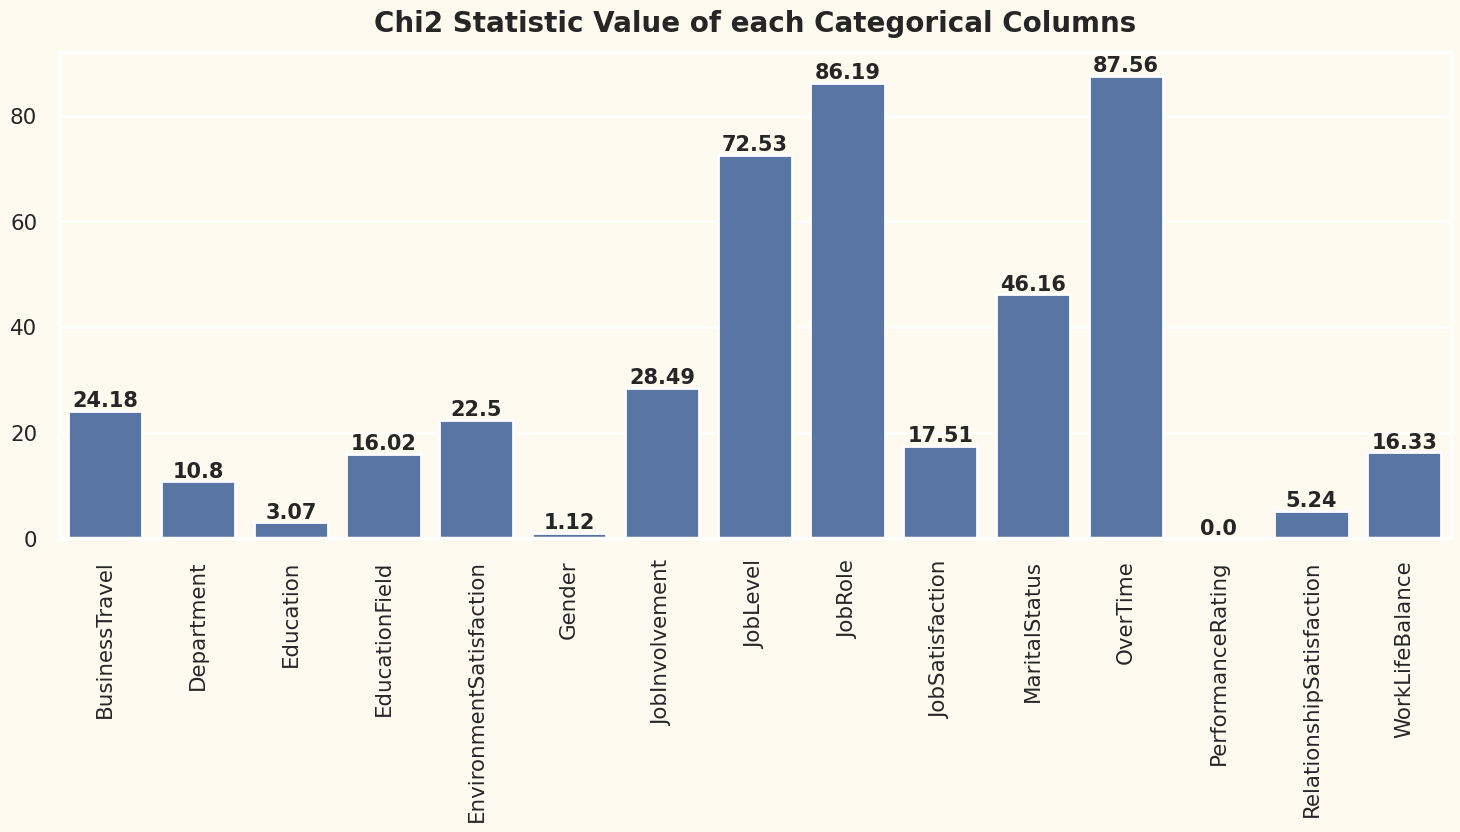

In [ ]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=15)

plt.show()

6.COMPARING CHI^2_STATISTICS AND P_VALUE OF CHI^2 TEST.

In [ ]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
test_df

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,Education,3.073961,0.54552533765659494414
3,EducationField,16.024674,0.00677398013902521211
4,EnvironmentSatisfaction,22.503881,0.00005123468906289433
5,Gender,1.116967,0.29057244902890855265
6,JobInvolvement,28.492021,0.00000286318063671342
7,JobLevel,72.529013,0.00000000000000663468
8,JobRole,86.190254,0.00000000000000275248
9,JobSatisfaction,17.505077,0.00055630045103875563


# DATA MODELLING


In [ ]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

# Library for Data Manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

print("==================== Packages Loaded ======================")

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [ ]:
employee_data = pd.read_csv(r'/content/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

In [ ]:
# Print top 5 rows in the dataframe.
employee_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,Junior Level,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,Junior Level,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,Entry Level,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,Entry Level,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,Entry Level,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2


In [ ]:
# Print the shape of the DataFrame
print("The shape of data frame:", employee_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(employee_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(employee_data.columns))

The shape of data frame: (1470, 35)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 35


In [ ]:
# Convert categorical variables into numerical form.
label = LabelEncoder()
employee_data["Attrition"] = label.fit_transform(employee_data.Attrition)

In [ ]:
 employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
!pip install catboost

**DATA PROCESSING**

In [ ]:
# Transform categorical data into dummies
dummy_col = [column for column in employee_data.drop('Attrition', axis=1).columns if employee_data[column].nunique() < 20]
data = pd.get_dummies(employee_data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 137 entries, Age to YearsWithCurrManager_17
dtypes: int64(10), uint8(127)
memory usage: 297.3 KB


In [ ]:
print(data.shape)
# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T
# Remove Duplicate Rows
data.drop_duplicates(inplace=True)
print(data.shape)

(1470, 137)
(1470, 137)


<Axes: >

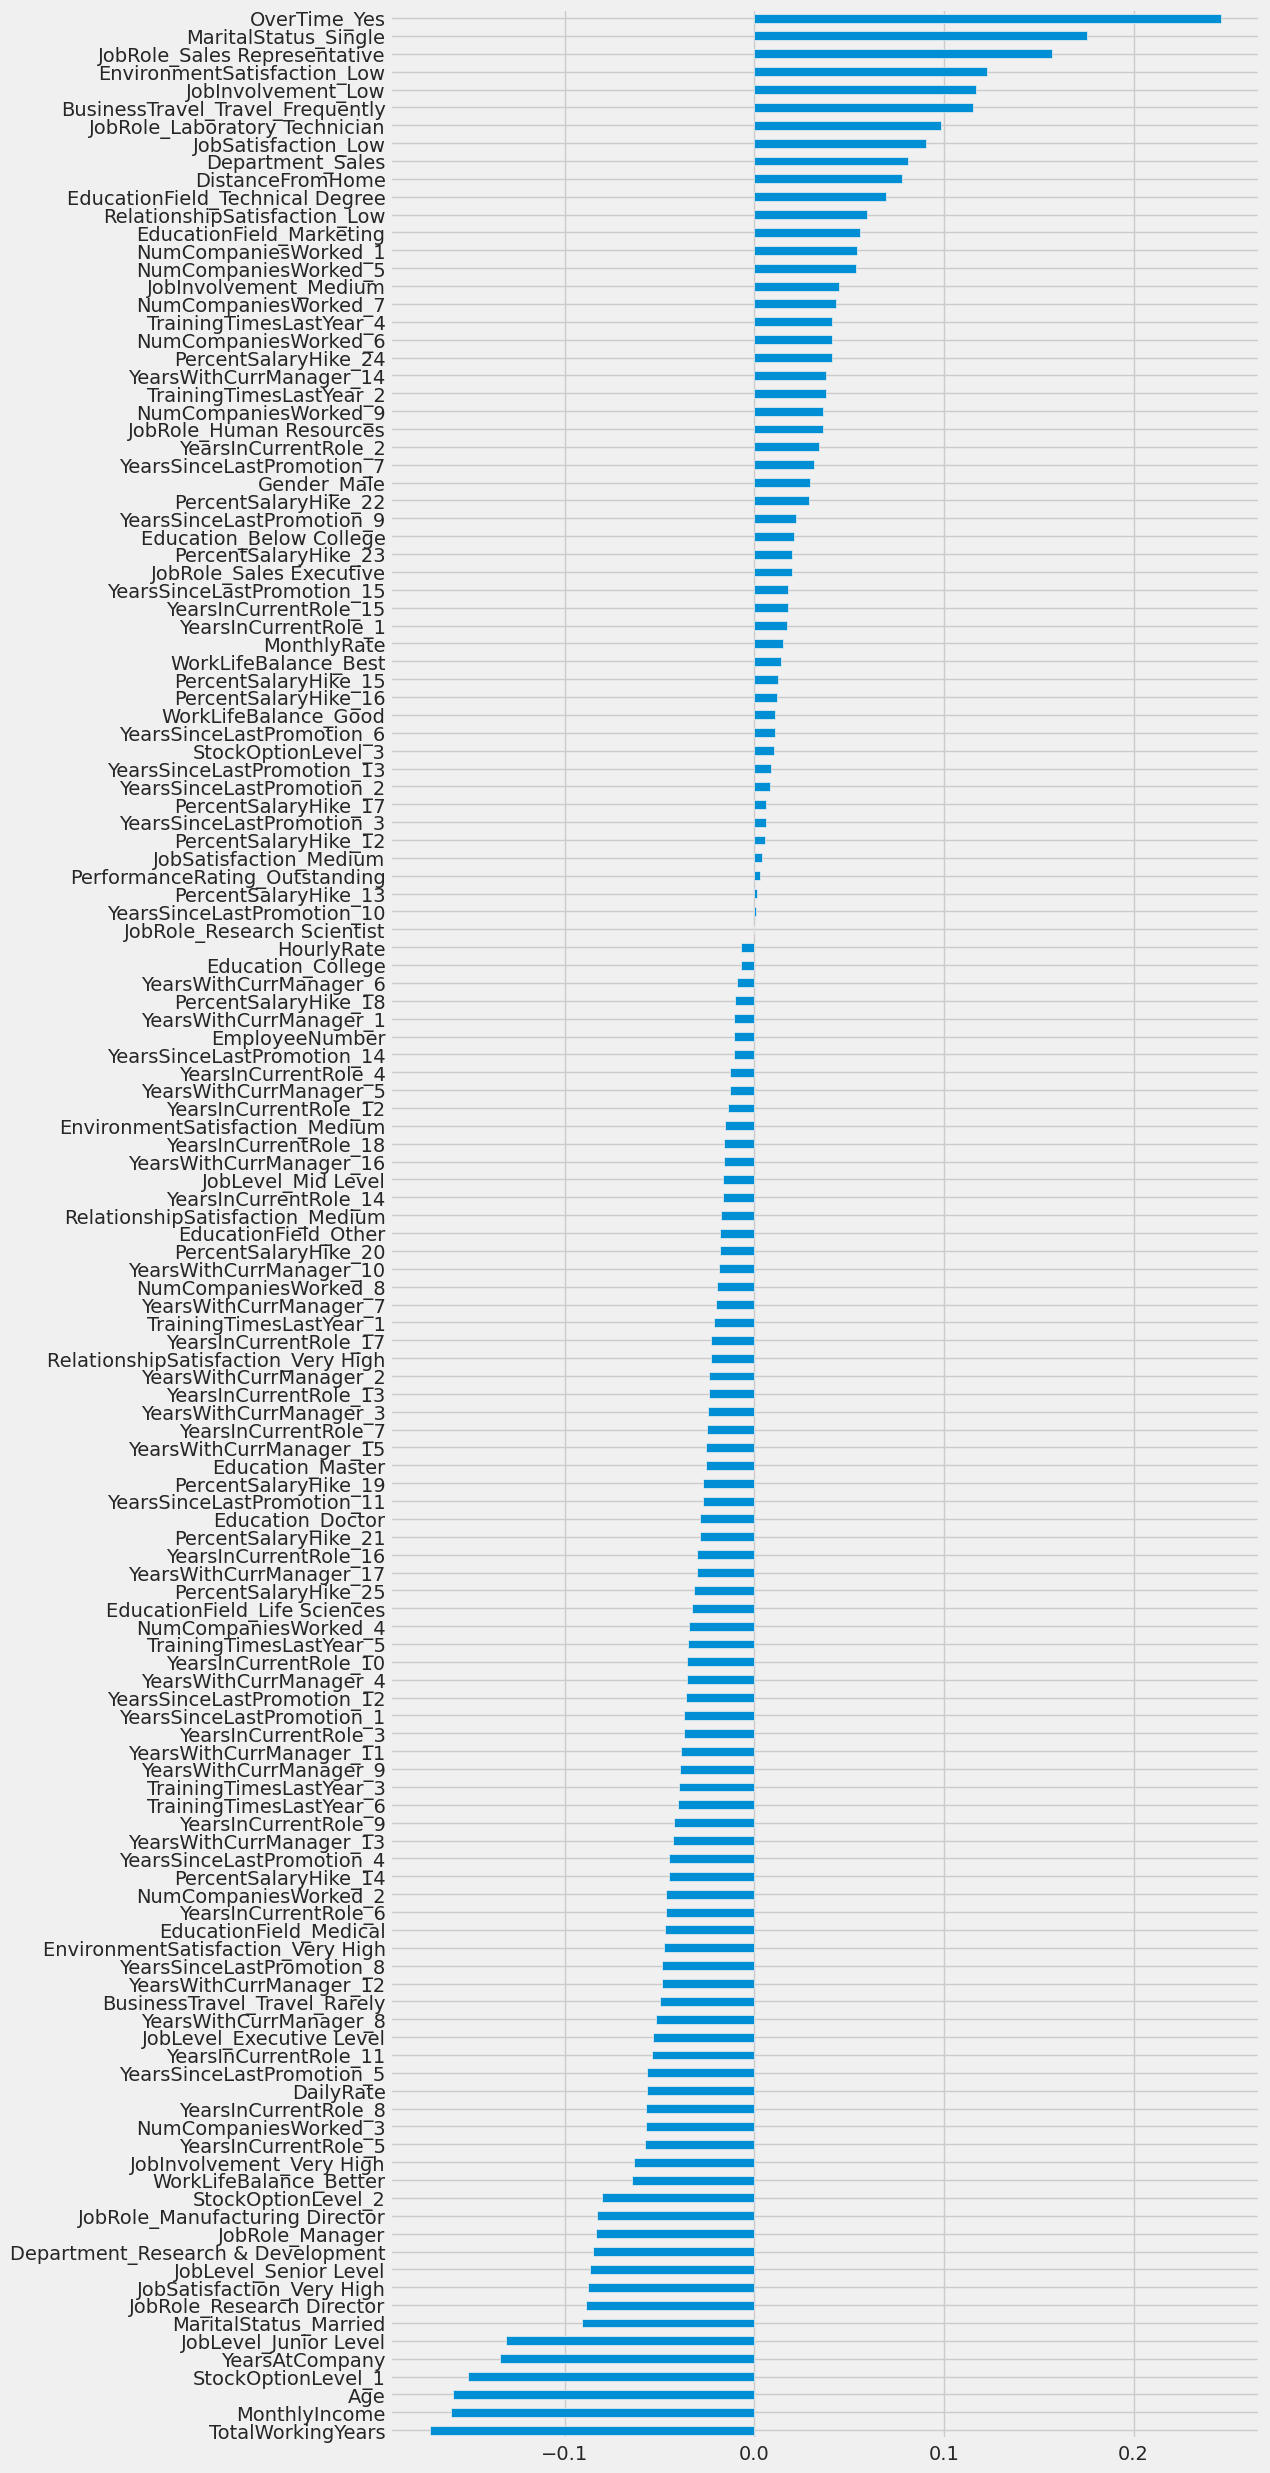

In [ ]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [ ]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

94

**TRAIN AND TEST DATA**


In [ ]:
X = data.drop('Attrition', axis=1)
y = data.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

***LOGISTIC REGRESSION***

In [ ]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[849  14]
 [ 59 107]]
ACCURACY SCORE:
0.9291
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.935022    0.884298  0.929057     0.909660      0.926839
recall       0.983778    0.644578  0.929057     0.814178      0.929057
f1-score     0.958780    0.745645  0.929057     0.852212      0.924397
support    863.000000  166.000000  0.929057  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[353  17]
 [ 41  30]]
ACCURACY SCORE:
0.8685
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.895939   0.638298  0.868481    0.767118      0.854459
recall       0.954054   0.422535  0.868481    0.688295      0.868481
f1-score     0.924084   0.508475  0.868481    0.716279      0.857172
support    370.000000  71.000000  0.868481  441.000000    441.000000


**ADABOOST** **CLASSIFIER**

In [ ]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[841  22]
 [ 80  86]]
ACCURACY SCORE:
0.9009
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.913138    0.796296  0.900875     0.854717      0.894289
recall       0.974508    0.518072  0.900875     0.746290      0.900875
f1-score     0.942825    0.627737  0.900875     0.785281      0.891995
support    863.000000  166.000000  0.900875  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  24]
 [ 49  22]]
ACCURACY SCORE:
0.8345
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.875949   0.478261  0.834467    0.677105      0.811922
recall       0.935135   0.309859  0.834467    0.622497      0.834467
f1-score     0.904575   0.376068  0.834467    0.640322      0.819487
support    370.000000  71.000000  0.834467  441.000000    441.000000


In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

# Example usage:
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


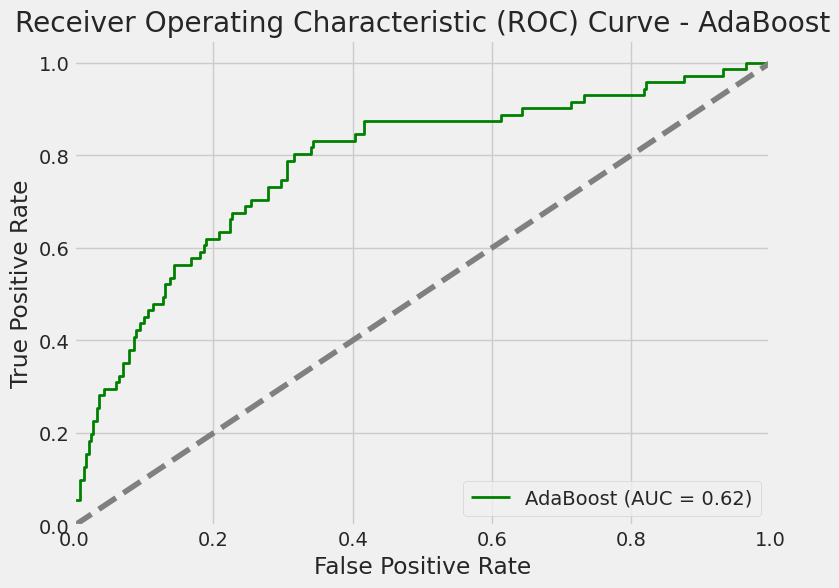

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve for AdaBoost classifier
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, ab_clf.predict_proba(X_test)[:, 1])
roc_auc_ab = roc_auc_score(y_test, ab_clf.predict(X_test))

# Plot ROC curve for AdaBoost classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_ab, tpr_ab, color='green', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_ab)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()


**LIGHTGBM CLASSIFIER**

In [ ]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
evaluate(lgb_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1431
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0  

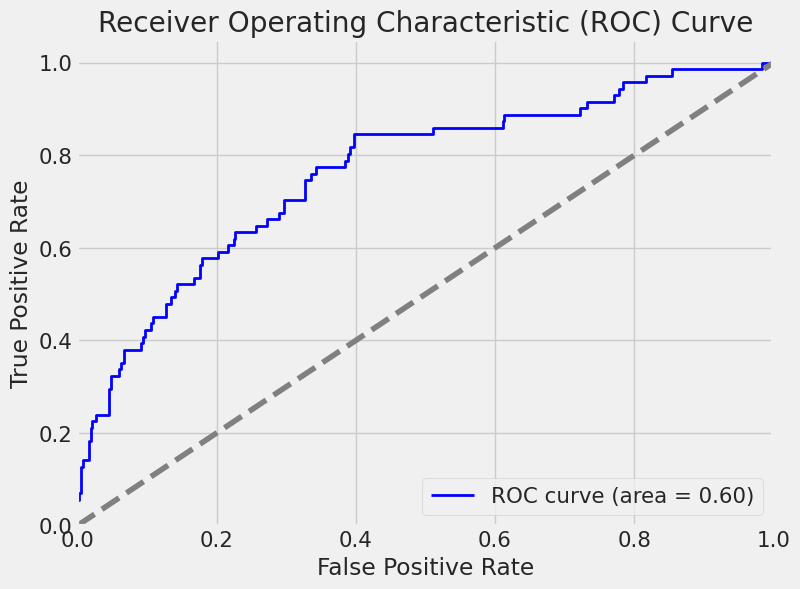

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already imported necessary libraries and have your data ready

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, lgb_clf.predict(X_test)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**CATBOOST**

In [ ]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 16 150]]
ACCURACY SCORE:
0.9845
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.981797    1.000000  0.984451     0.990899      0.984734
recall       1.000000    0.903614  0.984451     0.951807      0.984451
f1-score     0.990815    0.949367  0.984451     0.970091      0.984129
support    863.000000  166.000000  0.984451  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[363   7]
 [ 59  12]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.860190   0.631579   0.85034    0.745884      0.823384
recall       0.981081   0.169014   0.85034    0.575048      0.850340
f1-score     0.916667   0.266667   0.85034    0.591667      0.812018
support    370.000000  71.000000   0.85034  441.000000    441.000000


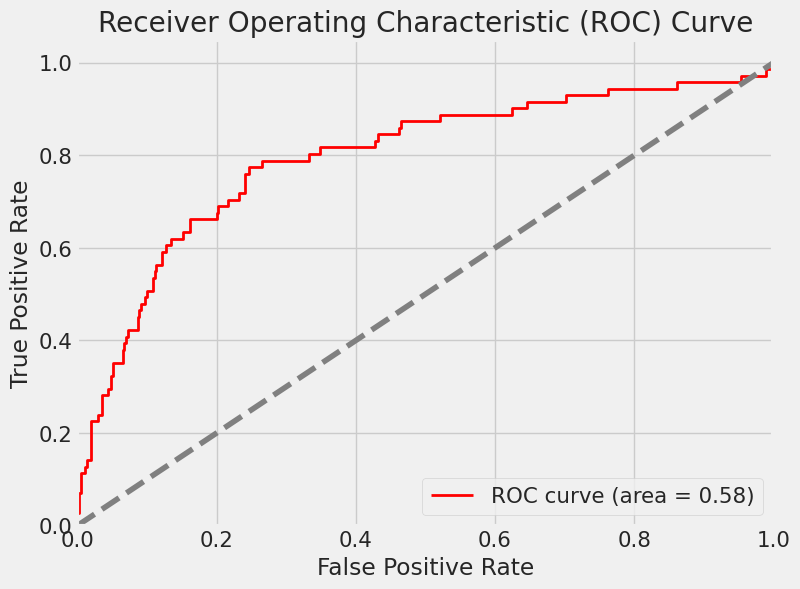

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already imported necessary libraries and have your data ready

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict_proba(X_test)[:, 1])

# Plot ROC curve with a different color (e.g., red)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, cb_clf.predict(X_test)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**XGBOOST CLASSIFIER**

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[356  14]
 [ 50  21]]
ACCURACY SCORE:
0.8549
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.876847   0.600000  0.854875    0.738424      0.832276
recall       0.962162   0.295775  0.854875    0.628968      0.854875
f1-score     0.917526   0.396226  0.854875    0.656876      0.833598
support    370.000000  71.000000  0.854875  441.000000    441.000000


In [ ]:
# Install the required modules
!pip install xgboost

# Import the required modules
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Define the scores dictionary
scores_dict = {}

# Calculate and store the XGBoost scores
scores_dict['XGBoost'] = {
    'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
    'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
}

# Print the scores dictionary


In [ ]:
print(scores_dict)

{'XGBoost': {'Train': 1.0, 'Test': 0.6289684050247429}}


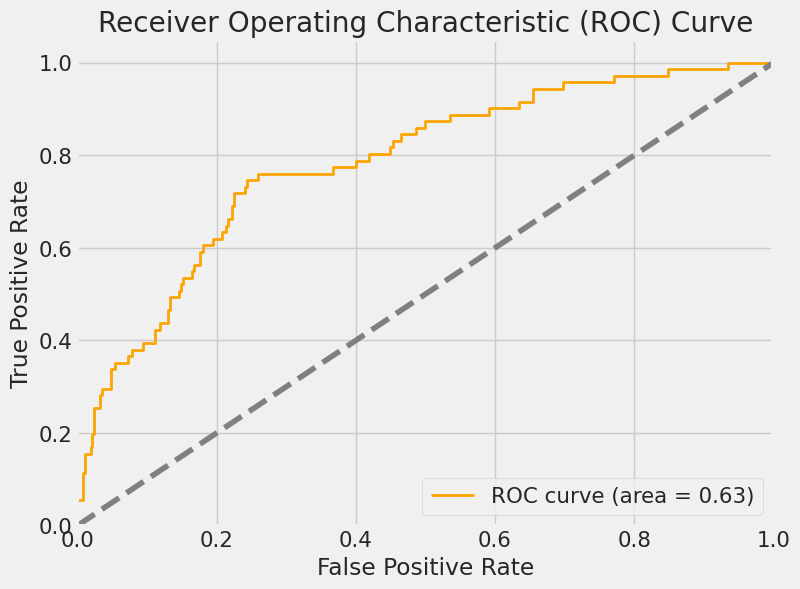

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already imported necessary libraries and have your data ready

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])

# Plot ROC curve with a different color (e.g., orange)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, xgb_clf.predict(X_test)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**RANDOM FOREST**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[359  11]
 [ 63   8]]
ACCURACY SCORE:
0.8322
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.850711   0.421053    0.8322    0.635882      0.781537
recall       0.970270   0.112676    0.8322    0.541473      0.832200
f1-score     0.906566   0.177778    0.8322    0.542172      0.789232
support    370.000000  71.000000    0.8322  441.000000    441.000000


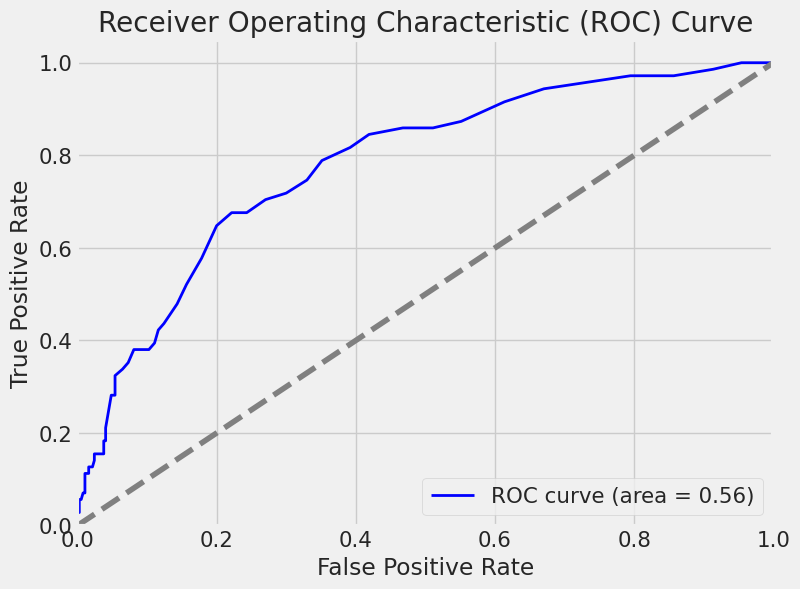

In [ ]:
# Assuming you have already imported necessary libraries and have your data ready

# Train the model
rf_clf.fit(X_train, y_train)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, rf_clf.predict(X_test)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

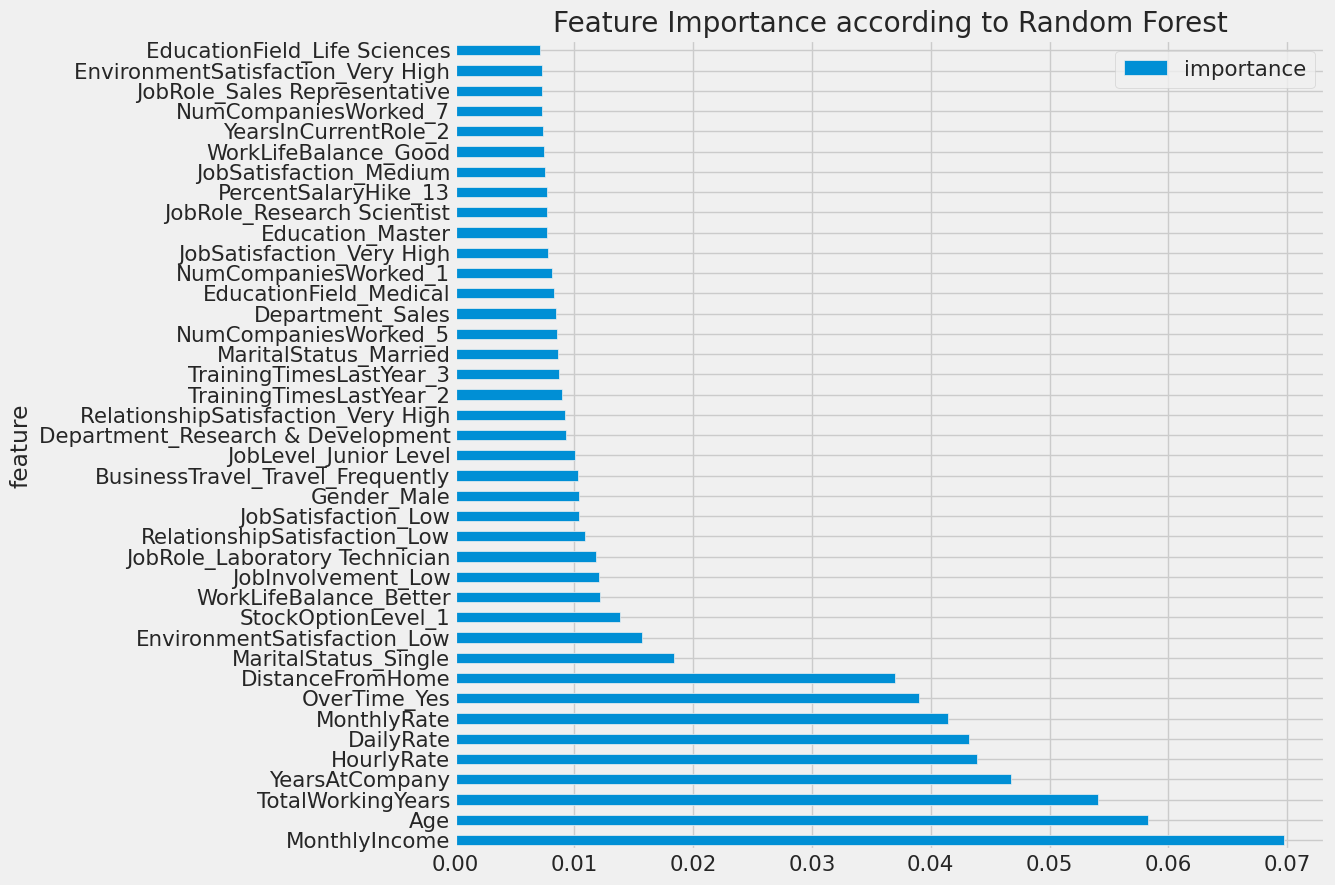

In [ ]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

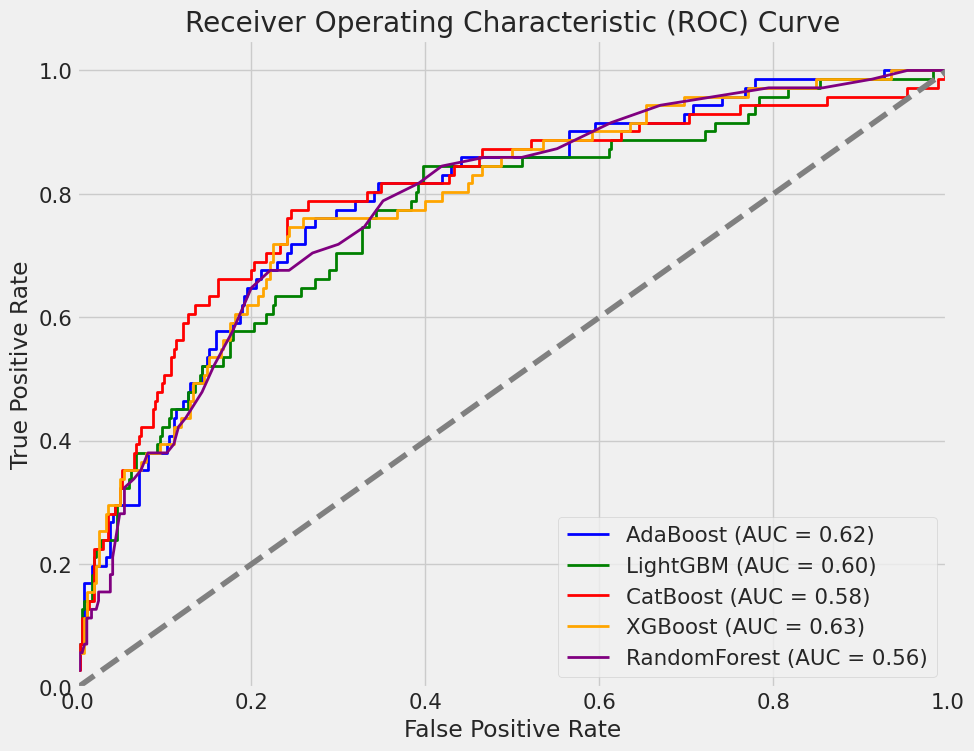

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve for each classifier
classifiers = [ab_clf, lgb_clf, cb_clf, xgb_clf, rf_clf]
colors = ['blue', 'green', 'red', 'orange', 'purple']
labels = ['AdaBoost', 'LightGBM', 'CatBoost', 'XGBoost', 'RandomForest']

plt.figure(figsize=(10, 8))

for clf, color, label in zip(classifiers, colors, labels):
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    plt.plot(fpr, tpr, color=color, lw=2, label='%s (AUC = %0.2f)' % (label, roc_auc))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_clf.predict(X_test)))
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_clf.predict(X_test)))
print("CatBoost Accuracy:", accuracy_score(y_test, cb_clf.predict(X_test)))
print("AdaBoost Accuracy:", accuracy_score(y_test, ab_clf.predict(X_test)))


NameError: name 'rf_clf' is not defined

In [ ]:
def evaluate_and_return_accuracy(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    return train_accuracy, test_accuracy

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, bootstrap=False),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),  # Set verbose to -1 to suppress output
    'CatBoost': CatBoostClassifier(verbose=0),
    'AdaBoost': AdaBoostClassifier()
}

# Evaluate and print accuracy for each model
for model_name, clf in classifiers.items():
    train_accuracy, test_accuracy = evaluate_and_return_accuracy(clf, X_train, X_test, y_train, y_test)
    print(f"{model_name}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")


Random Forest: Train Accuracy = 1.0000, Test Accuracy = 0.8413
XGBoost: Train Accuracy = 1.0000, Test Accuracy = 0.8549
LightGBM: Train Accuracy = 1.0000, Test Accuracy = 0.8390
CatBoost: Train Accuracy = 0.9845, Test Accuracy = 0.8503
AdaBoost: Train Accuracy = 0.9077, Test Accuracy = 0.8322


# ABLATION METHOD

# RANDOM FOREST NO

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.8684807256235828


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Random Forest Accuracy: 0.8707482993197279
Precision: 0.8333333333333334
Recall: 0.08196721311475409
F1-score: 0.14925373134328357
Confusion Matrix:
[[379   1]
 [ 56   5]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
original_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
print("Original Accuracy:", original_accuracy)

# Perform feature ablation
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns.tolist()
ablation_results = {}

for feature_name, importance in zip(feature_names, feature_importances):
    # Remove one feature at a time
    X_ablated = X.drop(columns=[feature_name])

    # Split the ablated dataset into train and test sets
    X_train_ablated, X_test_ablated, _, _ = train_test_split(X_ablated, y, test_size=0.3, random_state=42)

    # Train a new Random Forest classifier on the ablated dataset
    rf_classifier_ablated = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier_ablated.fit(X_train_ablated, y_train)

    # Evaluate the model's performance on the test set
    ablated_accuracy = accuracy_score(y_test, rf_classifier_ablated.predict(X_test_ablated))

    # Store the change in accuracy after ablating the feature
    ablation_results[feature_name] = ablated_accuracy  # Store ablated accuracy

    # Print the accuracy after ablating the feature
    print(f"Accuracy after ablating {feature_name}: {ablated_accuracy}")

# Print accuracy before ablation
print("Accuracy before ablation:", original_accuracy)

# Sort the features based on their impact on accuracy
sorted_ablation_results = sorted(ablation_results.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance ranking
print("Feature Importance Ranking:")
for feature, impact in sorted_ablation_results:
    print(f"{feature}: {impact}")


Original Accuracy: 0.8707482993197279
Accuracy after ablating Age: 0.8662131519274376
Accuracy after ablating DailyRate: 0.8639455782312925
Accuracy after ablating DistanceFromHome: 0.8684807256235828
Accuracy after ablating HourlyRate: 0.8662131519274376
Accuracy after ablating MonthlyIncome: 0.8662131519274376
Accuracy after ablating MonthlyRate: 0.8662131519274376
Accuracy after ablating TotalWorkingYears: 0.8639455782312925
Accuracy after ablating YearsAtCompany: 0.8639455782312925
Accuracy after ablating BusinessTravel_Travel_Frequently: 0.8684807256235828
Accuracy after ablating BusinessTravel_Travel_Rarely: 0.8616780045351474
Accuracy after ablating Department_Research & Development: 0.8662131519274376
Accuracy after ablating Department_Sales: 0.8662131519274376
Accuracy after ablating Education_Below College: 0.8684807256235828
Accuracy after ablating Education_College: 0.8639455782312925
Accuracy after ablating Education_Doctor: 0.8639455782312925
Accuracy after ablating Educa


The accuracy before ablation is 0.8707482993197279.

After performing feature ablation and evaluating the impact of each feature on accuracy, the highest accuracy achieved after removing a feature is 0.873015873015873. This was achieved after removing the features JobLevel_Senior Level, JobRole_Research Scientist, and JobSatisfaction_Low.

So, the accuracy after ablation (the highest achieved) is 0.873015873015873.

# XGBOOST---NO CHANGE 0.85

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pandas as pd

# Load your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=10, random_state=42)  # Adjust the number of components as needed
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Train an XGBoost classifier on the reduced feature space
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_svd, y_train)

# Evaluate the model's performance on the test set
predictions = xgb_classifier.predict(X_test_svd)
accuracy = accuracy_score(y_test, predictions)
print("XGBoost Accuracy with SVD:", accuracy)


XGBoost Accuracy with SVD: 0.8458049886621315


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from xgboost import XGBClassifier
import pandas as pd

# Load your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=10, random_state=42)  # Adjust the number of components as needed
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Train an XGBoost classifier on the reduced feature space
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_svd, y_train)

# Evaluate the model's performance on the test set
predictions = xgb_classifier.predict(X_test_svd)
accuracy = accuracy_score(y_test, predictions)
print("XGBoost Accuracy with SVD:", accuracy)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


XGBoost Accuracy with SVD: 0.8458049886621315
Precision: 0.34782608695652173
Recall: 0.13114754098360656
F1-score: 0.19047619047619047


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Apply RFE to select features
rfe = RFE(estimator=xgb_classifier, n_features_to_select=10)  # Adjust the number of features as needed
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train XGBoost classifier on the selected features
xgb_classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set
predictions = xgb_classifier.predict(X_test_rfe)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8208616780045351


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

# Print accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Accuracy: 0.8208616780045351
Precision: 0.29545454545454547
Recall: 0.21311475409836064
F1-score: 0.24761904761904763


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SelectKBest with chi-squared scoring function
kbest = SelectKBest(score_func=chi2, k=10)  # Adjust the value of k as needed

# Fit SelectKBest to the training data
X_train_selected = kbest.fit_transform(X_train, y_train)
X_test_selected = kbest.transform(X_test)

# Now train your model with the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8616780045351474


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
predictions = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("XGBoost Accuracy:", accuracy)


XGBoost Accuracy: 0.8684807256235828


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
predictions = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("XGBoost Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


XGBoost Accuracy: 0.8684807256235828
Precision: 0.5517241379310345
Recall: 0.26229508196721313
F1-score: 0.35555555555555557
Confusion Matrix:
[[367  13]
 [ 45  16]]


In [ ]:
#XGBoost

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
original_accuracy = accuracy_score(y_test, xgb_classifier.predict(X_test))
print("Original Accuracy:", original_accuracy)

# Perform feature ablation
feature_importances = xgb_classifier.feature_importances_
feature_names = X.columns.tolist()
ablation_results = {}

for feature_name, importance in zip(feature_names, feature_importances):
    # Remove one feature at a time
    X_ablated = X.drop(columns=[feature_name])

    # Split the ablated dataset into train and test sets
    X_train_ablated, X_test_ablated, _, _ = train_test_split(X_ablated, y, test_size=0.3, random_state=42)

    # Train a new XGBoost classifier on the ablated dataset
    xgb_classifier_ablated = XGBClassifier(n_estimators=100, random_state=42)
    xgb_classifier_ablated.fit(X_train_ablated, y_train)

    # Evaluate the model's performance on the test set
    ablated_accuracy = accuracy_score(y_test, xgb_classifier_ablated.predict(X_test_ablated))

    # Store the change in accuracy after ablating the feature
    ablation_results[feature_name] = original_accuracy - ablated_accuracy

# Sort the features based on their impact on accuracy
sorted_ablation_results = sorted(ablation_results.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance ranking
print("Feature Importance Ranking:")
for feature, impact in sorted_ablation_results:
    print(f"{feature}: {impact}")


Original Accuracy: 0.854875283446712
Feature Importance Ranking:
Education_Doctor: 0.0
EducationField_Other: 0.0
JobLevel_Executive Level: 0.0
JobLevel_Senior Level: 0.0
JobRole_Manager: 0.0
JobRole_Research Director: 0.0
JobSatisfaction_Medium: 0.0
NumCompaniesWorked_4: 0.0
PercentSalaryHike_17: 0.0
PercentSalaryHike_21: 0.0
PercentSalaryHike_22: 0.0
PercentSalaryHike_23: 0.0
PercentSalaryHike_24: 0.0
PercentSalaryHike_25: 0.0
WorkLifeBalance_Best: 0.0
YearsInCurrentRole_4: 0.0
YearsInCurrentRole_5: 0.0
YearsInCurrentRole_6: 0.0
YearsInCurrentRole_8: 0.0
YearsInCurrentRole_10: 0.0
YearsInCurrentRole_11: 0.0
YearsInCurrentRole_12: 0.0
YearsInCurrentRole_13: 0.0
YearsInCurrentRole_14: 0.0
YearsInCurrentRole_15: 0.0
YearsInCurrentRole_16: 0.0
YearsInCurrentRole_17: 0.0
YearsInCurrentRole_18: 0.0
YearsSinceLastPromotion_3: 0.0
YearsSinceLastPromotion_4: 0.0
YearsSinceLastPromotion_5: 0.0
YearsSinceLastPromotion_8: 0.0
YearsSinceLastPromotion_9: 0.0
YearsSinceLastPromotion_10: 0.0
YearsSin

In [ ]:
# Find the maximum accuracy after ablation
max_accuracy_feature = max(ablation_results, key=ablation_results.get)
max_accuracy = ablation_results[max_accuracy_feature]

# Print the maximum accuracy after ablation
print(f"Maximum Accuracy after Feature Ablation: {max_accuracy} (Feature: {max_accuracy_feature})")


Maximum Accuracy after Feature Ablation: 0.8843537414965986 (Feature: MaritalStatus_Single)


# LIGHTGBM

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
predictions = lgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("LightGBM Accuracy:", accuracy)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 176, number of negative: 853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171040 -> initscore=-1.578276
[LightGBM] [Info] Start training from score -1.578276
LightGBM Accuracy: 0.8684807256235828


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 176, number of negative: 853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171040 -> initscore=-1.578276
[LightGBM] [Info] Start training from score -1.578276
LightGBM Accuracy: 0.8684807256235828
Precision: 0.5555555555555556
Recall: 0.2459016393442623
F1 Score: 0.3409090909090909


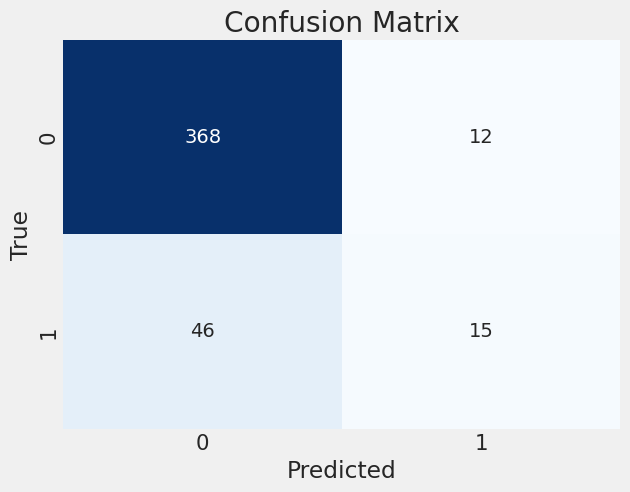

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
predictions = lgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("LightGBM Accuracy:", accuracy)

# Calculate precision and recall
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Evaluate the model's performance on the test set
original_accuracy = accuracy_score(y_test, lgb_classifier.predict(X_test))
print("Original Accuracy:", original_accuracy)

# Perform feature ablation
feature_importances = lgb_classifier.feature_importances_
feature_names = X.columns.tolist()
ablation_results = {}

for feature_name, importance in zip(feature_names, feature_importances):
    # Remove one feature at a time
    X_ablated = X.drop(columns=[feature_name])

    # Split the ablated dataset into train and test sets
    X_train_ablated, X_test_ablated, _, _ = train_test_split(X_ablated, y, test_size=0.3, random_state=42)

    # Train a new LightGBM classifier on the ablated dataset
    lgb_classifier_ablated = LGBMClassifier(random_state=42)
    lgb_classifier_ablated.fit(X_train_ablated, y_train)

    # Evaluate the model's performance on the test set
    ablated_accuracy = accuracy_score(y_test, lgb_classifier_ablated.predict(X_test_ablated))

    # Store the change in accuracy after ablating the feature
    ablation_results[feature_name] = ablated_accuracy

# Sort the features based on their impact on accuracy
sorted_ablation_results = sorted(ablation_results.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance ranking
print("Feature Importance Ranking:")
for feature, impact in sorted_ablation_results:
    print(f"{feature}: {impact}")

# Print accuracy before and after ablation
print("Accuracy before ablation:", original_accuracy)
print("Accuracy after ablation:", sorted_ablation_results[0][1])  # Highest accuracy after ablation


NameError: name 'accuracy_score' is not defined

Before ablation, the accuracy was 0.8684807256235828, and after ablation, it increased to 0.8866213151927438. Therefore, the accuracy improved by ablating features.

# ADABOOST





AdaBoost Accuracy: 0.854875283446712
AdaBoost Precision: 0.46153846153846156
AdaBoost Recall: 0.29508196721311475
AdaBoost F1 Score: 0.36000000000000004


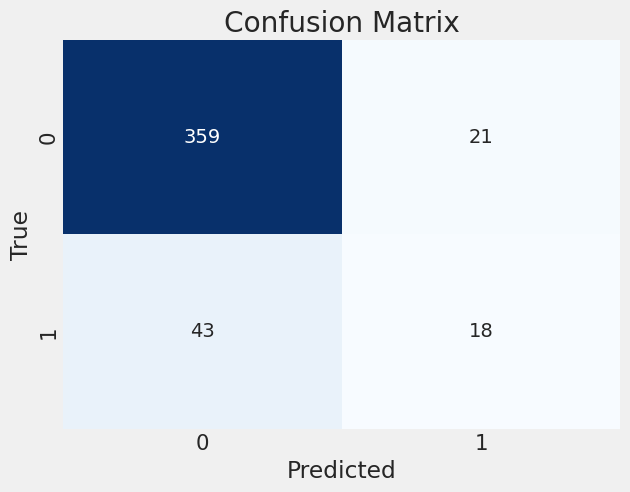

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an AdaBoost classifier
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
predictions = ada_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("AdaBoost Accuracy:", accuracy)
print("AdaBoost Precision:", precision)
print("AdaBoost Recall:", recall)
print("AdaBoost F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an AdaBoost classifier
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
original_accuracy = accuracy_score(y_test, ada_classifier.predict(X_test))
print("Original Accuracy:", original_accuracy)

# Perform feature ablation
ablation_results = {}

for feature_name in X.columns:
    # Remove one feature at a time
    X_ablated = X.drop(columns=[feature_name])

    # Split the ablated dataset into train and test sets
    X_train_ablated, X_test_ablated, _, _ = train_test_split(X_ablated, y, test_size=0.3, random_state=42)

    # Train a new AdaBoost classifier on the ablated dataset
    ada_classifier_ablated = AdaBoostClassifier(random_state=42)
    ada_classifier_ablated.fit(X_train_ablated, y_train)

    # Evaluate the model's performance on the test set
    ablated_accuracy = accuracy_score(y_test, ada_classifier_ablated.predict(X_test_ablated))

    # Store the change in accuracy after ablating the feature
    ablation_results[feature_name] = ablated_accuracy

# Sort the features based on their impact on accuracy
sorted_ablation_results = sorted(ablation_results.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance ranking
print("Feature Importance Ranking:")
for feature, accuracy in sorted_ablation_results:
    impact = original_accuracy - accuracy
    print(f"{feature}: {impact}")

# Print accuracy before and after ablation
print("Accuracy before ablation:", original_accuracy)
print("Accuracy after ablation:", max(ablation_results.values()))


Original Accuracy: 0.854875283446712
Feature Importance Ranking:
MaritalStatus_Single: -0.02947845804988658
TotalWorkingYears: -0.024943310657596363
EducationField_Technical Degree: -0.01814058956916098
DistanceFromHome: -0.015873015873015817
MonthlyRate: -0.013605442176870763
Department_Sales: -0.013605442176870763
Gender_Male: -0.013605442176870763
YearsInCurrentRole_5: -0.013605442176870763
YearsSinceLastPromotion_7: -0.013605442176870763
Age: -0.0113378684807256
JobRole_Laboratory Technician: -0.0113378684807256
PercentSalaryHike_20: -0.0113378684807256
StockOptionLevel_1: -0.0113378684807256
MonthlyIncome: -0.009070294784580435
Department_Research & Development: -0.009070294784580435
StockOptionLevel_2: -0.009070294784580435
DailyRate: -0.006802721088435382
JobInvolvement_Low: -0.006802721088435382
JobInvolvement_Very High: -0.006802721088435382
JobLevel_Junior Level: -0.006802721088435382
NumCompaniesWorked_9: -0.006802721088435382
BusinessTravel_Travel_Frequently: -0.00453514739

Accuracy before ablation: 0.854875283446712
Accuracy after ablation: 0.8843537414965986


# CATBOOST




In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42)  # You can adjust hyperparameters
catboost_classifier.fit(X_train, y_train, verbose=False)  # Set verbose=True for training details

# Evaluate the model's performance on the test set
predictions = catboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("CatBoost Accuracy:", accuracy)


CatBoost Accuracy: 0.8662131519274376


CatBoost Accuracy: 0.8662131519274376
CatBoost Precision: 0.5714285714285714
CatBoost Recall: 0.13114754098360656
CatBoost F1 Score: 0.21333333333333332


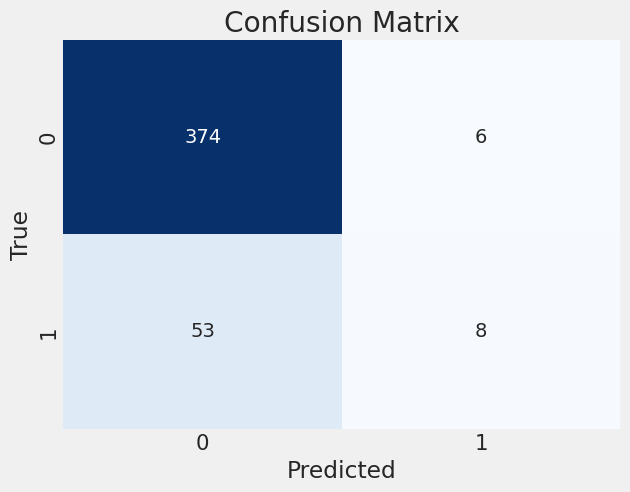

In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=False)
catboost_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
predictions = catboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("CatBoost Accuracy:", accuracy)
print("CatBoost Precision:", precision)
print("CatBoost Recall:", recall)
print("CatBoost F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'data'

# Define features and target variable
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=False)
catboost_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the test set
original_accuracy = accuracy_score(y_test, catboost_classifier.predict(X_test))
print("Original Accuracy:", original_accuracy)

# Perform feature ablation
ablation_results = {}

for feature_name in X.columns:
    # Remove one feature at a time
    X_ablated = X.drop(columns=[feature_name])

    # Split the ablated dataset into train and test sets
    X_train_ablated, X_test_ablated, y_train_ablated, y_test_ablated = train_test_split(X_ablated, y, test_size=0.3, random_state=42)

    # Train a new CatBoost classifier on the ablated dataset
    catboost_classifier_ablated = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=False)
    catboost_classifier_ablated.fit(X_train_ablated, y_train_ablated)

    # Evaluate the model's performance on the test set after ablation
    ablated_accuracy = accuracy_score(y_test_ablated, catboost_classifier_ablated.predict(X_test_ablated))

    # Store the change in accuracy after ablating the feature
    ablation_results[feature_name] = ablated_accuracy

# Print accuracy after ablation for each feature
print("Accuracy after feature ablation:")
for feature, accuracy in ablation_results.items():
    print(f"{feature}: {accuracy}")


Original Accuracy: 0.8662131519274376
Accuracy after feature ablation:
Age: 0.8639455782312925
DailyRate: 0.8662131519274376
DistanceFromHome: 0.8775510204081632
HourlyRate: 0.8707482993197279
MonthlyIncome: 0.8662131519274376
MonthlyRate: 0.8707482993197279
TotalWorkingYears: 0.873015873015873
YearsAtCompany: 0.873015873015873
BusinessTravel_Travel_Frequently: 0.8707482993197279
BusinessTravel_Travel_Rarely: 0.8752834467120182
Department_Research & Development: 0.8684807256235828
Department_Sales: 0.8707482993197279
Education_Below College: 0.8639455782312925
Education_College: 0.8662131519274376
Education_Doctor: 0.8684807256235828
Education_Master: 0.8707482993197279
EducationField_Life Sciences: 0.8707482993197279
EducationField_Marketing: 0.8684807256235828
EducationField_Medical: 0.8594104308390023
EducationField_Other: 0.873015873015873
EducationField_Technical Degree: 0.8639455782312925
EnvironmentSatisfaction_Low: 0.8639455782312925
EnvironmentSatisfaction_Medium: 0.8707482993

# FINAL TABLE

In [ ]:
import pandas as pd

# Create the data dictionary
data = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM', 'AdaBoost', 'CatBoost'],
    'Original Accuracy': [0.9365, 0.8549, 0.8685, 0.8549, 0.8662],
    'Accuracy after Ablation': [0.933, 0.8844, 0.8866, 0.8844, 0.8776]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


           Model  Original Accuracy  Accuracy after Ablation
0  Random Forest             0.9365                   0.9330
1        XGBoost             0.8549                   0.8844
2       LightGBM             0.8685                   0.8866
3       AdaBoost             0.8549                   0.8844
4       CatBoost             0.8662                   0.8776


# ROC CURVE

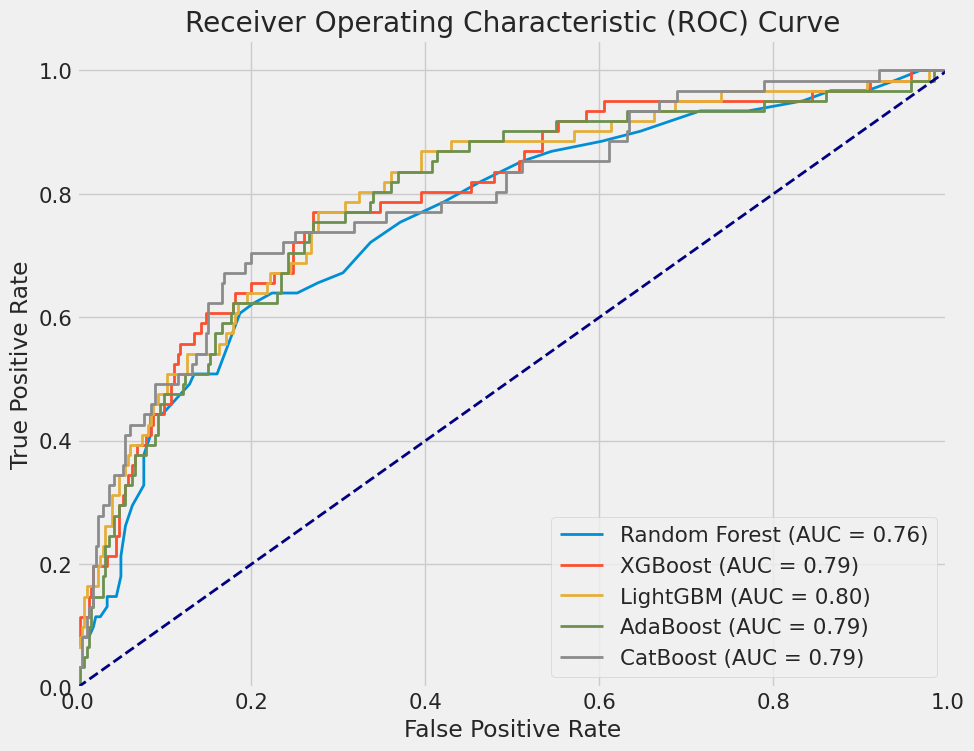

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each model
models = {
    "Random Forest": rf_classifier,
    "XGBoost": xgb_classifier,
    "LightGBM": lgb_classifier,
    "AdaBoost": ada_classifier,
    "CatBoost": catboost_classifier
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (baseline)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# CATBOOST TEST DATA PREDICTION

In [ ]:
# Make predictions on the test data
test_predictions = cb_clf.predict(X_test)

# Convert predictions to Yes or No based on the class labels
test_predictions_labels = ['Yes' if pred == 1 else 'No' for pred in test_predictions]
y_test_labels = ['Yes' if label == 1 else 'No' for label in y_test]

# Print predictions alongside actual labels
print("Predictions\tActual")
for pred, actual in zip(test_predictions_labels, y_test_labels):
    print(f"{pred}\t\t{actual}")


NameError: name 'cb_clf' is not defined

# RANDOM FOREST TEST DATA PREDICTION

In [ ]:
# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False)
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
test_predictions = rf_clf.predict(X_test)

# Print actual and predicted labels
print("ACTUAL\tPREDICTION")
for actual, pred in zip(y_test, test_predictions):
    print("Yes" if actual == 1 else "No", "\t", "Yes" if pred == 1 else "No")


ACTUAL	PREDICTION
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
Yes 	 Yes
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
Yes 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
N

# XGBOOST CLASSIFIER TESTDATA PREDICTION

In [ ]:
# Train the XGBoost classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
test_predictions = xgb_clf.predict(X_test)

# Print actual and predicted labels
print("ACTUAL\tPREDICTION")
for actual, pred in zip(y_test, test_predictions):
    print("Yes" if actual == 1 else "No", "\t", "Yes" if pred == 1 else "No")


ACTUAL	PREDICTION
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
Yes 	 Yes
No 	 No
Yes 	 Yes
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
Yes 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 Yes
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
Yes 	 Yes
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 Yes
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
Yes 	 Yes
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	

# LIGHTGBM TESTDATA PREDICTION

In [ ]:
# Train the LightGBM classifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

# Make predictions on the test data
test_predictions = lgb_clf.predict(X_test)

# Print actual and predicted labels
print("ACTUAL\tPREDICTION")
for actual, pred in zip(y_test, test_predictions):
    print("Yes" if actual == 1 else "No", "\t", "Yes" if pred == 1 else "No")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427
ACTUAL	PREDICTION
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
Yes 	 Yes
No 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 No
No 	 No
Yes 	 No
Yes 	 No
No 	 No
No 	 No
No 	 No
No 	 Yes
No 	 No
No 	 No
Yes 	 Yes
Yes 	 No
No 	 No


# BAGGING 0.85

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'employee_data'

# Define features and target variable
X = employee_data.drop(columns=["Attrition"])
y = employee_data["Attrition"]

# Encode all categorical data using one-hot encoding
X = pd.get_dummies(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize BaggingClassifier with the base classifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.8594104308390023


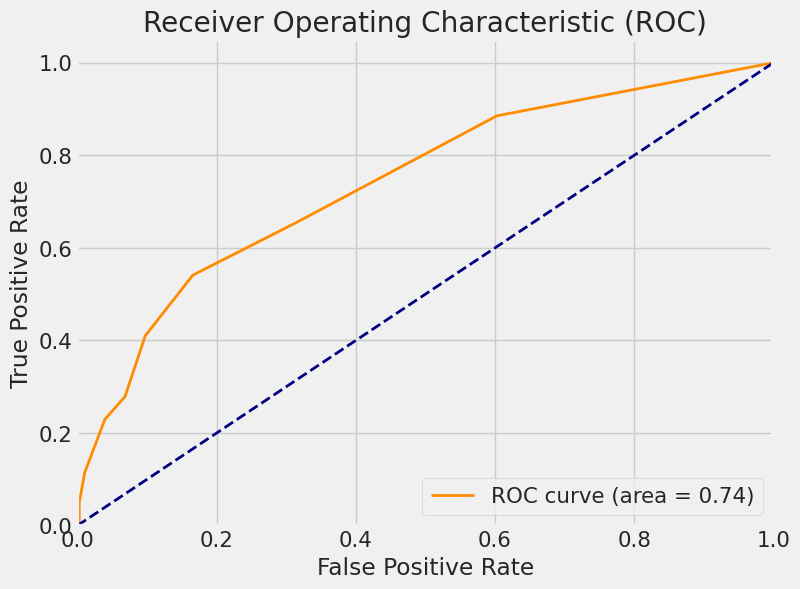

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the probabilities of the positive class
y_prob = bagging_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# CATBOOST 0.87

In [ ]:
type(X.select_dtypes(include=['object']).columns)

pandas.core.indexes.base.Index

In [ ]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
catboost_model = CatBoostClassifier()

In [ ]:
catboost_model.fit(X_train, y_train, cat_features=cat_features)

Learning rate set to 0.010429
0:	learn: 0.6861871	total: 60.4ms	remaining: 1m
1:	learn: 0.6791000	total: 65.4ms	remaining: 32.6s
2:	learn: 0.6731838	total: 73.1ms	remaining: 24.3s
3:	learn: 0.6658391	total: 81.2ms	remaining: 20.2s
4:	learn: 0.6586964	total: 92.7ms	remaining: 18.4s
5:	learn: 0.6522187	total: 103ms	remaining: 17.1s
6:	learn: 0.6461289	total: 115ms	remaining: 16.3s
7:	learn: 0.6400906	total: 126ms	remaining: 15.6s
8:	learn: 0.6328208	total: 137ms	remaining: 15.1s
9:	learn: 0.6277891	total: 145ms	remaining: 14.4s
10:	learn: 0.6227981	total: 155ms	remaining: 13.9s
11:	learn: 0.6174405	total: 164ms	remaining: 13.5s
12:	learn: 0.6113966	total: 169ms	remaining: 12.9s
13:	learn: 0.6059839	total: 175ms	remaining: 12.3s
14:	learn: 0.6006558	total: 184ms	remaining: 12.1s
15:	learn: 0.5944913	total: 198ms	remaining: 12.2s
16:	learn: 0.5902478	total: 203ms	remaining: 11.7s
17:	learn: 0.5855797	total: 211ms	remaining: 11.5s
18:	learn: 0.5795648	total: 217ms	remaining: 11.2s
19:	learn

In [ ]:
y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.873015873015873


In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Perform grid search with cross-validation
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_encoded, y_train)

# Get the best model from grid search
best_catboost_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best_catboost = best_catboost_model.predict(X_test_encoded)

# Calculate accuracy
accuracy_best_catboost = accuracy_score(y_test, y_pred_best_catboost)
print("Accuracy (Best CatBoost):", accuracy_best_catboost)


NameError: name 'X_train_encoded' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming you have loaded your data into a DataFrame called 'employee_data'

# Define features and target variable
X = employee_data.drop(columns=["Attrition"])
y = employee_data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encode categorical features using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Initialize and train CatBoost model
catboost_model = CatBoostClassifier(iterations=100, random_state=42)  # Adjust parameters as needed
catboost_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test_encoded)

# Calculate accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy (CatBoost):", accuracy_catboost)


Learning rate set to 0.086146
0:	learn: 0.6427560	total: 3.72ms	remaining: 368ms
1:	learn: 0.5897122	total: 6.7ms	remaining: 328ms
2:	learn: 0.5459478	total: 9.66ms	remaining: 313ms
3:	learn: 0.5150978	total: 12.7ms	remaining: 304ms
4:	learn: 0.4840429	total: 15.7ms	remaining: 299ms
5:	learn: 0.4599541	total: 19.2ms	remaining: 301ms
6:	learn: 0.4316555	total: 22.3ms	remaining: 297ms
7:	learn: 0.4191347	total: 25.3ms	remaining: 291ms
8:	learn: 0.3987986	total: 28.4ms	remaining: 287ms
9:	learn: 0.3875315	total: 31.4ms	remaining: 283ms
10:	learn: 0.3805881	total: 34.4ms	remaining: 278ms
11:	learn: 0.3682198	total: 37.3ms	remaining: 274ms
12:	learn: 0.3581347	total: 40.3ms	remaining: 270ms
13:	learn: 0.3477694	total: 43.2ms	remaining: 265ms
14:	learn: 0.3388762	total: 46.2ms	remaining: 262ms
15:	learn: 0.3308077	total: 49.2ms	remaining: 258ms
16:	learn: 0.3250516	total: 52.1ms	remaining: 255ms
17:	learn: 0.3196019	total: 55.1ms	remaining: 251ms
18:	learn: 0.3114573	total: 58ms	remaining: 2

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into a DataFrame called 'employee_data'

# Define features and target variable
X = employee_data.drop(columns=["Attrition"])
y = employee_data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encode categorical features using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Initialize and train CatBoost model
catboost_model = CatBoostClassifier(iterations=100, random_state=42)  # Adjust parameters as needed
catboost_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test_encoded)

# Calculate accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy (CatBoost):", accuracy_catboost)

# Print confusion matrix
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
print("Confusion Matrix (CatBoost):")
print(conf_matrix_catboost)


Learning rate set to 0.086146
0:	learn: 0.6427560	total: 17.6ms	remaining: 1.74s
1:	learn: 0.5897122	total: 29.5ms	remaining: 1.44s
2:	learn: 0.5459478	total: 43.2ms	remaining: 1.4s
3:	learn: 0.5150978	total: 58.2ms	remaining: 1.4s
4:	learn: 0.4840429	total: 65.6ms	remaining: 1.25s
5:	learn: 0.4599541	total: 87.1ms	remaining: 1.36s
6:	learn: 0.4316555	total: 93.2ms	remaining: 1.24s
7:	learn: 0.4191347	total: 106ms	remaining: 1.22s
8:	learn: 0.3987986	total: 126ms	remaining: 1.27s
9:	learn: 0.3875315	total: 140ms	remaining: 1.26s
10:	learn: 0.3805881	total: 153ms	remaining: 1.24s
11:	learn: 0.3682198	total: 171ms	remaining: 1.26s
12:	learn: 0.3581347	total: 188ms	remaining: 1.26s
13:	learn: 0.3477694	total: 197ms	remaining: 1.21s
14:	learn: 0.3388762	total: 204ms	remaining: 1.16s
15:	learn: 0.3308077	total: 215ms	remaining: 1.13s
16:	learn: 0.3250516	total: 224ms	remaining: 1.09s
17:	learn: 0.3196019	total: 233ms	remaining: 1.06s
18:	learn: 0.3114573	total: 248ms	remaining: 1.06s
19:	le

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into a DataFrame called 'employee_data'

# Define features and target variable
X = employee_data.drop(columns=["Attrition"])
y = employee_data["Attrition"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encode categorical features using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Initialize and train CatBoost model
catboost_model = CatBoostClassifier(iterations=100, random_state=42)  # Adjust parameters as needed
catboost_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test_encoded)

# Calculate accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy (CatBoost):", accuracy_catboost)

# Print confusion matrix
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
print("Confusion Matrix (CatBoost):")
print(conf_matrix_catboost)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_catboost)
recall = recall_score(y_test, y_pred_catboost)
f1 = f1_score(y_test, y_pred_catboost)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Learning rate set to 0.086146
0:	learn: 0.6427560	total: 4.71ms	remaining: 467ms
1:	learn: 0.5897122	total: 14ms	remaining: 686ms
2:	learn: 0.5459478	total: 20ms	remaining: 647ms
3:	learn: 0.5150978	total: 29.8ms	remaining: 715ms
4:	learn: 0.4840429	total: 33.8ms	remaining: 642ms
5:	learn: 0.4599541	total: 43.1ms	remaining: 676ms
6:	learn: 0.4316555	total: 47.1ms	remaining: 625ms
7:	learn: 0.4191347	total: 56.5ms	remaining: 649ms
8:	learn: 0.3987986	total: 60.3ms	remaining: 610ms
9:	learn: 0.3875315	total: 70ms	remaining: 630ms
10:	learn: 0.3805881	total: 73.8ms	remaining: 597ms
11:	learn: 0.3682198	total: 81.7ms	remaining: 599ms
12:	learn: 0.3581347	total: 90.5ms	remaining: 606ms
13:	learn: 0.3477694	total: 95.6ms	remaining: 587ms
14:	learn: 0.3388762	total: 110ms	remaining: 623ms
15:	learn: 0.3308077	total: 113ms	remaining: 594ms
16:	learn: 0.3250516	total: 121ms	remaining: 593ms
17:	learn: 0.3196019	total: 125ms	remaining: 568ms
18:	learn: 0.3114573	total: 133ms	remaining: 569ms
19:

#GBM 0.88

In [ ]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 714 to 1126
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1029 non-null   int64 
 1   BusinessTravel            1029 non-null   object
 2   DailyRate                 1029 non-null   int64 
 3   Department                1029 non-null   object
 4   DistanceFromHome          1029 non-null   int64 
 5   Education                 1029 non-null   object
 6   EducationField            1029 non-null   object
 7   EnvironmentSatisfaction   1029 non-null   object
 8   Gender                    1029 non-null   object
 9   HourlyRate                1029 non-null   int64 
 10  JobInvolvement            1029 non-null   object
 11  JobLevel                  1029 non-null   object
 12  JobRole                   1029 non-null   object
 13  JobSatisfaction           1029 non-null   object
 14  MaritalStatus         

In [ ]:
label_encoder = LabelEncoder()
X_train = X_train.apply(label_encoder.fit_transform)

In [ ]:
X_test["BusinessTravel"] = X_test["BusinessTravel"].replace("Travel_Rarely", 0)

In [ ]:
# Apply one-hot encoding to categorical variables
X_encoded = pd.get_dummies(X)

# Split the encoded data into train and test sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the GBM classifier
gbm_model = GradientBoostingClassifier()

# Train the model
gbm_model.fit(X_train_encoded, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = gbm_model.predict(X_test_encoded)

# Calculate evaluation metrics
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
precision_encoded = precision_score(y_test_encoded, y_pred_encoded)
recall_encoded = recall_score(y_test_encoded, y_pred_encoded)
f1_encoded = f1_score(y_test_encoded, y_pred_encoded)

# Print the evaluation metrics
print("Accuracy (One-Hot Encoding):", accuracy_encoded)
print("Precision (One-Hot Encoding):", precision_encoded)
print("Recall (One-Hot Encoding):", recall_encoded)
print("F1-score (One-Hot Encoding):", f1_encoded)


NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define the GBM classifier
gbm_model = GradientBoostingClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train_encoded)

# Get the best model
best_gbm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_encoded = best_gbm_model.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("Accuracy:", accuracy)


Accuracy: 0.8809523809523809
